<a href="https://colab.research.google.com/github/sathishrouthu/Image-Classification-CIFAR10/blob/main/ImgeClassification_CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import numpy as np
import keras
from keras.datasets import cifar10

In [24]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation,Flatten
import keras.layers
from keras.layers import Conv2D, MaxPooling2D, GlobalMaxPooling2D,BatchNormalization

In [4]:
import matplotlib.pyplot as plt

In [5]:
batch_size = 32 
num_classes = 10
#epochs = 1600
data_augmentation = True

In [6]:
(X_train,y_train),(X_test,y_test) = cifar10.load_data()

In [7]:
print(X_train.shape)
print(X_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [8]:
print(y_train.shape)
print(y_test.shape)

(50000, 1)
(10000, 1)


In [9]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [10]:
y_train[0]

array([6], dtype=uint8)

In [11]:
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)

In [12]:
classes = ["aeroplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

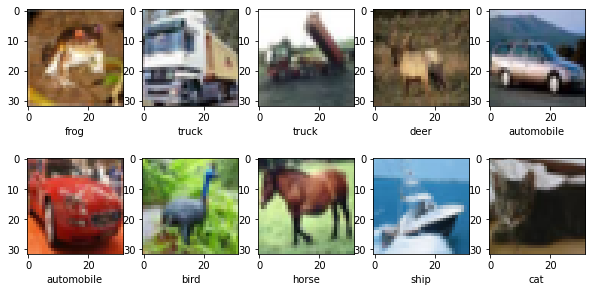

In [13]:
plt.figure(figsize=(10,5))
for i in range(10):
  plt.subplot(2,5,i+1)
  plt.imshow(X_train[i])
  plt.xlabel(classes[y_train[i]])

In [14]:
X_train = X_train/255
X_test = X_test/255

# ANN

In [15]:
ann = Sequential([
        Flatten(input_shape=(32,32,3)),
        Dense(3000, activation='relu'),
        Dense(1000, activation='relu'),
        Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 8s 4ms/step - loss: 1.8113 - accuracy: 0.3523
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6208 - accuracy: 0.4283
Epoch 3/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5400 - accuracy: 0.4554
Epoch 4/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4821 - accuracy: 0.4774
Epoch 5/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4334 - accuracy: 0.4957
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.3916 - accuracy: 0.5099
Epoch 7/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.3534 - accuracy: 0.5248
Epoch 8/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.3176 - accuracy: 0.5383
Epoch 9/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.2849 - accuracy: 0.5503
Epoch 10/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.255

In [16]:
ann.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.4520 - accuracy: 0.4772


[1.452046275138855, 0.4772000014781952]

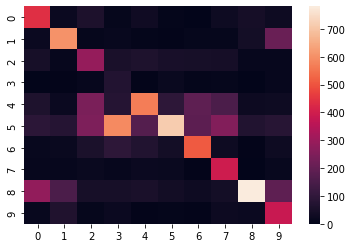

In [20]:
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(i) for i in y_pred]

from sklearn.metrics import confusion_matrix
import seaborn as sns

sns.heatmap(confusion_matrix(y_pred_classes,y_test))

In [21]:
from sklearn.metrics import classification_report

In [23]:
print(classification_report(y_pred_classes,y_test))

              precision    recall  f1-score   support

           0       0.44      0.65      0.53       680
           1       0.60      0.64      0.62       945
           2       0.29      0.46      0.36       639
           3       0.07      0.48      0.13       151
           4       0.57      0.39      0.46      1470
           5       0.72      0.29      0.41      2489
           6       0.51      0.59      0.55       866
           7       0.40      0.75      0.52       528
           8       0.78      0.47      0.59      1664
           9       0.39      0.68      0.49       568

    accuracy                           0.48     10000
   macro avg       0.48      0.54      0.46     10000
weighted avg       0.59      0.48      0.49     10000



# CNN

In [31]:
cnn =Sequential([
    Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    MaxPooling2D((2,2)),

    Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    MaxPooling2D((2,2)),    

    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])



In [33]:
cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [35]:
cnn.fit(X_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1026 - accuracy: 0.6156
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9720 - accuracy: 0.6614
Epoch 3/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8915 - accuracy: 0.6908
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8246 - accuracy: 0.7136
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7714 - accuracy: 0.7312
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7219 - accuracy: 0.7472
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6813 - accuracy: 0.7623
Epoch 8/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6422 - accuracy: 0.7755
Epoch 9/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6067 - accuracy: 0.7865
Epoch 10/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.575

In [36]:
y_pred_prob = cnn.predict(X_test)
y_pred = [np.argmax(i) for i in y_pred_prob]

In [37]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.76      0.73      0.75      1043
           1       0.86      0.76      0.80      1137
           2       0.56      0.63      0.59       882
           3       0.49      0.51      0.50       963
           4       0.66      0.62      0.64      1058
           5       0.55      0.67      0.60       820
           6       0.77      0.74      0.76      1049
           7       0.77      0.73      0.75      1050
           8       0.83      0.79      0.81      1057
           9       0.76      0.81      0.79       941

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.70     10000
weighted avg       0.71      0.70      0.70     10000

